### Шаг 1 и 2. Открываю файлы с данными, изучаю общую информацию, предобрабатываю данные

In [2]:
import pandas as pd
import matplotlib as mplt
import matplotlib.pyplot as plt
import numpy as np
data_calls = pd.read_csv('/datasets/calls.csv')

#data_calls.info()
data_calls.head(15)
print((data_calls[data_calls['duration'] == 0.00 ]['duration']).count())
data_calls.replace(to_replace = 0.00, 
                 value = 1.00)
data_calls = data_calls.drop_duplicates()
data_calls.duplicated().sum()
data_calls['user_id'] = data_calls['user_id'].astype('int')
data_calls['call_date']= pd.to_datetime(data_calls['call_date']) 
data_calls.head(15)

39613


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


Просматриваю датасет, меняю типы данных в столбцах о данных клиентов и времени звонков
Заменяем нули в разговоре на 1 минуту, т.к. обычно плата списывается поминутно, меняю формат даты на удобочитаемый

In [3]:
data_internet = pd.read_csv('/datasets/internet.csv')
data_internet
print((data_internet[data_internet['mb_used'] == 0.00 ]['mb_used']).count())
data_internet.replace(to_replace = 0.00, 
                 value = 1.00)

data_internet = data_internet.drop_duplicates()
data_internet.duplicated().sum()
data_internet['user_id'] = data_internet['user_id'].astype('int')
data_internet['session_date']= pd.to_datetime(data_internet['session_date']) 
data_internet

19598


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


Просматриваю датасет, меняю типы данных в столбцах о данных клиентов и времени сессии.
Заменяем нули в разговоре на 1 минуту, т.к. обычно плата списывается поминутно, меняю формат даты на удобочитаемый

In [4]:
data_messages = pd.read_csv('/datasets/messages.csv')
data_messages.info()
data_messages
#здесь ничего не трогаем, кроме дубликатов

data_messages = data_messages.drop_duplicates()
data_messages.duplicated().sum()
data_messages['user_id'] = data_messages['user_id'].astype('int')
data_messages['message_date']= pd.to_datetime(data_messages['message_date']) 
data_messages

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


Просматриваю датасет, меняю типы данных в столбцах о данных клиентов и времени сессии.

In [5]:
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
data_tariffs['tariff_name'] = data_tariffs['tariff_name'].astype(str)
data_tariffs.rename(columns=lambda x: x.replace('tariff_name', 'tariff'), inplace=True)
data_tariffs


,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Меняю имя столбца с тарифами для последующей склейки с другими датасетами

In [6]:
data_users = pd.read_csv('/datasets/users.csv')
data_users
data_users['city'].unique()
data_users = data_users.drop_duplicates()
data_users.duplicated().sum()
data_users = data_users.fillna('2020-02-20')
data_users['user_id'] = data_users['user_id'].astype('int')
data_users['tariff'] = data_users['tariff'].astype(str)
data_users['churn_date']= pd.to_datetime(data_users['churn_date']) 
data_users['reg_date']= pd.to_datetime(data_users['reg_date']) 
data_users



,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,2020-02-20,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,2020-02-20,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,2020-02-20,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,2020-02-20,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,2020-02-20,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,2020-02-20,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,2020-02-20,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,2020-02-20,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


Заполняю пропуски по времени отключения тарифа сегодняшним числом, т.к. тариф в любом случае перестанет действовать, заодно меняю формат даты на удобочитаемый

In [7]:
import math
data_calls['month'] = pd.DatetimeIndex(data_calls['call_date']).month
data_calls['duration'] = np.ceil(data_calls['duration'])
data_calls_grouped = data_calls.groupby(['user_id', 'month'], as_index= False)['duration'].sum()
data_calls_pivot_final = data_calls_grouped.merge(data_users[['user_id', 'tariff']], how = 'left', on ='user_id')
data_calls_pivot_final

,user_id,month,duration,tariff
0,1000,5,159.0,ultra
1,1000,6,172.0,ultra
2,1000,7,340.0,ultra
3,1000,8,408.0,ultra
4,1000,9,466.0,ultra
...,...,...,...,...
3169,1498,10,247.0,smart
3170,1499,9,70.0,smart
3171,1499,10,449.0,smart
3172,1499,11,612.0,smart


In [8]:
data_messages['month'] = pd.DatetimeIndex(data_messages['message_date']).month
data_messages_grouped = data_messages.groupby(['user_id', 'month'], as_index= False)['message_date'].count()
data_messages_pivot_final = data_messages_grouped.merge(data_users[['user_id', 'tariff']], how = 'left', on ='user_id')
data_messages_pivot_final

,user_id,month,message_date,tariff
0,1000,5,22,ultra
1,1000,6,60,ultra
2,1000,7,75,ultra
3,1000,8,81,ultra
4,1000,9,57,ultra
...,...,...,...,...
2712,1498,10,42,smart
2713,1499,9,11,smart
2714,1499,10,48,smart
2715,1499,11,59,smart


In [9]:
data_internet['month'] = pd.DatetimeIndex(data_internet['session_date']).month
data_internet['gb_used'] = data_internet['mb_used']/1024
data_internet_grouped = data_internet.groupby(['user_id', 'month'], as_index= False)['gb_used'].sum()

#data_internet_pivot = data_internet.pivot_table(index = ['user_id'], values = ['mb_used', 'session_date'],columns = 'month' ,aggfunc = {'session_date':'count', 'mb_used': 'sum'})
#data_internet_pivot_merged = data_internet_grouped.merge((data_internet.groupby(['user_id', 'month'], as_index= False)['session_date'].count()), how ='left', on ='user_id')
#data_internet_pivot_merged
#data_internet_pivot_merged = data_internet_pivot.merge(data_users, on = 'user_id')
#data_internet_pivot_merged = data_internet_pivot.fillna(0)
data_internet_pivot_final = data_internet_grouped.merge(data_users[['user_id', 'tariff']], how = 'left', on ='user_id')
data_internet_pivot_final

,user_id,month,gb_used,tariff
0,1000,5,2.200674,ultra
1,1000,6,22.689229,ultra
2,1000,7,13.675430,ultra
3,1000,8,13.726494,ultra
4,1000,9,14.227451,ultra
...,...,...,...,...
3198,1498,10,20.097031,smart
3199,1499,9,1.802490,smart
3200,1499,10,17.371592,smart
3201,1499,11,17.542295,smart


In [10]:
test = data_calls_pivot_final.merge((data_messages_pivot_final.merge(data_internet_pivot_final,  how = 'outer', on = ['user_id', 'month','tariff']))
                                       , how = 'outer', on = ['user_id', 'month','tariff'])
test


,user_id,month,duration,tariff,message_date,gb_used
0,1000,5,159.0,ultra,22.0,2.200674
1,1000,6,172.0,ultra,60.0,22.689229
2,1000,7,340.0,ultra,75.0,13.675430
3,1000,8,408.0,ultra,81.0,13.726494
4,1000,9,466.0,ultra,57.0,14.227451
...,...,...,...,...,...,...
3209,1489,9,NaN,smart,32.0,16.803027
3210,1489,10,NaN,smart,21.0,19.101016
3211,1489,11,NaN,smart,20.0,17.081602
3212,1489,12,NaN,smart,35.0,16.916514


In [11]:
data_full_pivot_internet = test.pivot_table(index = ['user_id'], values ='gb_used', columns = 'month' ).merge(data_users[['tariff', 'user_id']], how = 'outer', on ='user_id')
data_full_pivot_internet = data_full_pivot_internet.fillna(0)

data_full_pivot_calls = test.pivot_table(index = ['user_id', 'tariff'], values ='duration', columns = 'month' ).merge(data_users[['tariff', 'user_id']], how = 'outer', on ='user_id')
data_full_pivot_calls = data_full_pivot_calls.fillna(0)

data_full_pivot_messages = test.pivot_table(index = ['user_id', 'tariff'], values ='message_date', columns = 'month' ).merge(data_users[['tariff', 'user_id']], how = 'outer', on ='user_id')
data_full_pivot_messages = data_full_pivot_messages.fillna(0)
def proceeds_calls(row):
    if row['tariff'] == 'smart':
        for i in range(2,3):
            if row[i] > 500:
                row[i] = (row[i] - 500) * 3 
            elif row[i] <= 500:
                row[i] =  0
 
    if row['tariff'] == 'ultra':
        for i in range(2,3):
            if row[i] > 3000:
                row[i] = row[i] - 3000 
            elif row[i] <= 3000:
                row[i] = 0
    return row

def proceeds_internet(row):
    if row['tariff'] == 'smart':
        for i in range(5,6):
            if row[i] > 15:
                row[i] = (row[i] - 15) * 200 
            elif row[i] <= 15:
                row[i] =  0
 
    if row['tariff'] == 'ultra':
        for i in range(5,6):
            if row[i] > 30:
                row[i] = (row[i] - 30) * 150 
            elif row[i] <= 30:
                row[i] = 0
    return row


def proceeds_messages(row):
    if row['tariff'] == 'smart':
        for i in range(4,5):
            if row[i] > 50:
                row[i] = (row[i] - 50) * 3 
            elif row[i] <= 50:
                row[i] =  0
 
    if row['tariff'] == 'ultra':
        for i in range(4,5):
            if row[i] > 1000:
                row[i] = row[i] - 1000  
            elif row[i] <= 1000:
                row[i] = 0
    return row

def proceeds_all(row):
    if row['tariff'] == 'smart':
        for i in range(6,7):
            row[i] =  550
            
    if row['tariff'] == 'ultra':
        for i in range(6,7):
            row[i] = 1950
    return row





#data_full_sum_internet = data_full_pivot_internet.apply(proceeds_internet, axis = 1)
#data_full_sum_internet = data_full_sum_internet.fillna(0)

#data_full_sum_messages = data_full_pivot_messages.apply(proceeds_messages, axis = 1)
#data_full_sum_messages = data_full_sum_messages.fillna(0)

#data_full_sum_calls = data_full_pivot_calls.apply(proceeds_calls, axis = 1)
#data_full_sum_calls = data_full_sum_calls.fillna(0)

#data_full_sum_zero = data_full_sum_calls + data_full_sum_messages + data_full_sum_internet
#data_full_sum_zero = data_full_sum_calls.apply(proceeds_all, axis = 1)
#data_full_sum_zero['user_id'] = (data_full_sum_zero['user_id']/3).astype('int')
#data_full_sum_zero = (data_full_sum_zero.drop(['tariff'], axis='columns', inplace=False)).merge(data_users[['user_id', 'tariff']], on = 'user_id', how = 'left')


#data_full_sum = data_full_sum_internet + data_full_sum_messages +data_full_sum_calls 
#data_full_sum['user_id'] = (data_full_sum['user_id']/3).astype('int')
#data_full_sum = (data_full_sum.drop(['tariff'], axis='columns', inplace=False)).merge(data_users[['user_id', 'tariff']], on = 'user_id', how = 'left')



#data_full_sum_all = data_full_sum.apply(proceeds_all, axis = 1)
#data_full_sum_final = data_full_sum_all + data_full_sum
#data_full_sum_final['user_id'] = (data_full_sum_final['user_id']/2).astype('int')
#data_full_sum_final = (data_full_sum_final.drop(['tariff'], axis='columns', inplace=False)).merge(data_users[['user_id', 'tariff']], on = 'user_id', how = 'left')



test_final = test.fillna(0).apply(proceeds_calls, axis = 1).apply(proceeds_messages,axis = 1).apply(proceeds_internet, axis = 1)
test_final['per_month'] = pd.Series
test_final = test_final.apply(proceeds_all, axis =1)
test_final['revenue'] = test_final['per_month'] + test_final['duration'] +test_final['message_date'] +test_final['gb_used']
test_final['revenue'] = test_final['revenue'].astype(int)
revenue_count = test_final.drop(['gb_used', 'message_date', 'duration', 'per_month'], axis='columns', inplace=False)
revenue_count





,user_id,month,tariff,revenue
0,1000,5,ultra,1950
1,1000,6,ultra,1950
2,1000,7,ultra,1950
3,1000,8,ultra,1950
4,1000,9,ultra,1950
...,...,...,...,...
3209,1489,9,smart,910
3210,1489,10,smart,1370
3211,1489,11,smart,966
3212,1489,12,smart,933


### Вывод 
Датасеты, в целом, не имеют значимых проблем со структурой данных, теперь они подготовлены к следующим операциям.


### Шаг 3 Анализ данных

In [12]:
import numpy as np
internet_mean = data_internet_pivot_final['gb_used'].mean()
calls_mean = data_calls_pivot_final['duration'].mean()
messages_mean = data_messages_pivot_final['message_date'].mean()
internet_mean, calls_mean, messages_mean
print( 'Рассмотрим средние значения для:\nИспользованного трафика по всем пользователям:',internet_mean,
      '\nМинут разговоров по всем пользователям:',calls_mean,
      '\nКоличество смс по всем пользователям:', messages_mean)


variance_estimate_internet = np.var(data_internet_pivot_final['gb_used'], ddof=1)
standard_deviation_internet = np.sqrt(variance_estimate_internet)

variance_estimate_calls = np.var(data_calls_pivot_final['duration'], ddof=1)
standard_deviation_calls = np.sqrt(variance_estimate_calls)


variance_estimate_messages = np.var(data_messages_pivot_final['message_date'], ddof=1)
standard_deviation_messages = np.sqrt(variance_estimate_messages)

print( '\nСчитаем дисперсию и стандартное отклонение для:\nИспользованного трафика по всем пользователям:',variance_estimate_internet,'/',standard_deviation_internet,
      '\nМинут разговоров по всем пользователям:',variance_estimate_calls,'/',standard_deviation_calls,
      '\nКоличество смс по всем пользователям:',variance_estimate_messages,'/',standard_deviation_messages)


Рассмотрим средние значения для:
Использованного трафика по всем пользователям: 16.862020142859233 
Минут разговоров по всем пользователям: 456.9316320100819 
Количество смс по всем пользователям: 45.28376886271623

Считаем дисперсию и стандартное отклонение для:
Использованного трафика по всем пользователям: 53.87842281658211 / 7.340192287439213 
Минут разговоров по всем пользователям: 56658.88564895877 / 238.03127031749162 
Количество смс по всем пользователям: 1228.5980170128298 / 35.051362555724275


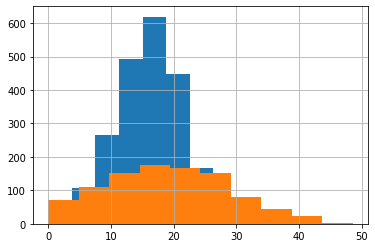

In [13]:
data_internet_pivot_final_smart = data_internet_pivot_final.query('tariff=="smart"')
data_internet_pivot_final_ultra = data_internet_pivot_final.query('tariff=="ultra"')
data_internet_pivot_final_smart['gb_used'].hist(bins = 10)
data_internet_pivot_final_ultra['gb_used'].hist(bins = 10)
#Датасеты скошены вправо, такие датасеты также называют датасетами с положительной скошенностью, 
#ведь дополнительные значения находятся со стороны положительного направления оси.

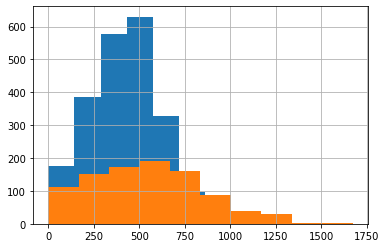

In [14]:
data_calls_pivot_final_smart = data_calls_pivot_final.query('tariff=="smart"')
data_calls_pivot_final_ultra = data_calls_pivot_final.query('tariff=="ultra"')
data_calls_pivot_final_smart['duration'].hist(bins = 10)
data_calls_pivot_final_ultra['duration'].hist(bins = 10)
#Датасеты скошены вправо

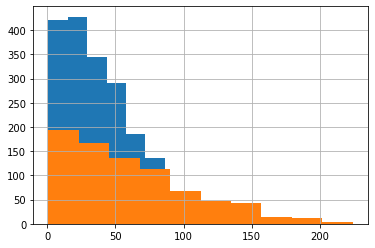

In [15]:
data_messages_pivot_final_smart = data_messages_pivot_final.query('tariff=="smart"')
data_messages_pivot_final_ultra = data_messages_pivot_final.query('tariff=="ultra"')
data_messages_pivot_final_smart['message_date'].hist(bins = 10)
data_messages_pivot_final_ultra['message_date'].hist(bins = 10)
#Датасеты скошены вправо

### Вывод 
Пользователи предпочитают использовать интернет чаще, чем любые другие услуги тарифов, скорее всего это свзяано с тем, что тестовые сообщения, как и сами звони перешли в мессенджеры. 

Подсчитаны средние значения использования пользователями каждой из услуг для тарифов. 

Подсчитано среднее количество, дисперсия и стандартное отклонение. Построены гистограммы и описаны распределения.



### Шаг 4 Проверка гипотез

In [70]:
revenue_count_pivot = revenue_count.pivot_table(index = ['user_id', 'tariff'], values ='revenue', columns = 'month' ).fillna(0)
revenue_count_pivot = revenue_count_pivot.rename(columns={1: "January", 2: "February",3:"March",4:'April', 5:'May',6:'June',7:'July', 8:'August',9:'September', 10:'October', 11:'November', 12:'December'})
data_full_sum_city = revenue_count.merge(data_users[['user_id', 'tariff','city']], on = ['user_id', 'tariff'], how = 'outer').fillna(0)
#data_full_sum['overall'] = data_full_sum.loc[:, '1': '12'].mean()
revenue_count_smart = revenue_count.query('tariff == "smart"')
revenue_count_ultra = revenue_count.query('tariff == "ultra"')

alpha = .05

results = st.ttest_ind(
    revenue_count_smart['revenue'], 
    revenue_count_ultra['revenue'])

print('p-значение:', results.pvalue)

if results.pvalue  < alpha :
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")



p-значение: 1.3841523297824925e-192
Отвергаем нулевую гипотезу
1230.156123822342
2059.8


In [69]:
#средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;


data_full_sum_moscow = data_full_sum_city.query('city == "Москва"')
data_full_sum_other =  data_full_sum_city.query('city != "Москва"')


alpha = .05

results = st.ttest_ind(
    data_full_sum_other['revenue'], 
    data_full_sum_moscow['revenue'])

print('p-значение:', results.pvalue)

if results.pvalue  < alpha :
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")




p-значение: 0.45019016656523225
Не получилось отвергнуть нулевую гипотезу


Нулевые гипотезы для анализа заключались в том, различаются ли доходности с разных тарифов, то есть больше ли выручки приносят пользователи одного тарифа, чем другого. Нулевая гипотеза подтвердилась(пользователи тарифа Smart тратят , в среднем, больше, чем пользователи другого тарифа)

Альтернативная гипотеза, соответственно, что тарифы приносят приблизительно равный доход.


Во второй случае за нулевую гипотезу принял отличие дохода, получаемого от пользователей из Москвы по отношению к пользователям из других регионов, т.е. пользователи из Москвы ,вероятно, тратят больше на услуги тарифов.

Альтернативная гипотеза, соответственно, что пользователи из Москвы тратят на тарифы меньше, чеим пользователи из регионов.



### Шаг 5. Вывод

    1)Датасеты, в целом, не имеют значимых проблем со структурой данных.

    2)Пользователи предпочитают использовать интернет чаще, чем любые другие услуги тарифов, скорее всего это свзяано с тем, что тестовые сообщения, как и сами звонки перешли в мессенджеры. 

    3)Средняя выручка пользователей тарифа Smart не отличается от средней выручки пользователей тарифа Ultra

    4)Выручка от пользователей тарифов из Москвы потличается от выручки пользователей тарифов из других регионов.